# TrES-3b: Overview of the broadband analysis results

*<a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a>, University of Oxford*

This notebook is a part in a series of notebooks working as an appendix to Parviainen et al. (2015, submitted), aiming to make the analysis presented in the paper easily reproductable. The results and the figures presented in the paper can be reproduced by following these notebooks in the numbered order.

*Dependencies:* See `000_README.ipynb` for the list of required Python packages, and how to install them.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import math as mt
import pandas as pd
import seaborn as sb
from pandas import HDFStore
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.lpf_ww import LPFunction as LPFW
from src.lpf_wr import LPFunction as LPFR

from core import *

In [3]:
fwn = pd.read_hdf('results/pe.h5','bb/wn_nomask')
fwm = pd.read_hdf('results/pe.h5','bb/wn_masked')
frn = pd.read_hdf('results/pe.h5','bb/rn_nomask')
frm = pd.read_hdf('results/pe.h5','bb/rn_masked')

In [4]:
pe = pd.Panel(dict(wn = pd.read_hdf('results/pe.h5','bb/wn_nomask'),
                   wm = pd.read_hdf('results/pe.h5','bb/wn_masked'),
                   rn = pd.read_hdf('results/pe.h5','bb/rn_nomask'),
                   rm = pd.read_hdf('results/pe.h5','bb/rn_masked')))

for name,df in pe.iteritems():
    df['e_ppm'] = 1e6*df.e

## Plots 

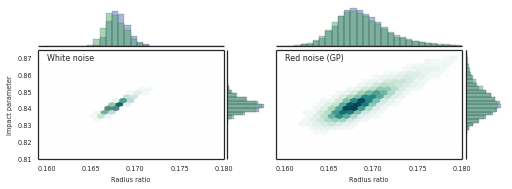

In [5]:
def hexbin2(fig, ax, a1, a2, b1, b2, alim, blim, gs):
    h1 = ax.hexbin(a1, b1, extent=(alim[0],alim[1],blim[0],blim[1]), 
                   gridsize=gs, cmap=plt.cm.Blues)
    h2 = ax.hexbin(a2, b2, extent=(alim[0],alim[1],blim[0],blim[1]), 
                   gridsize=gs, cmap=plt.cm.Greens)
    fig.canvas.draw()
    fc = h1.get_facecolors() + h2.get_facecolors()
    fc *= 0.5
    fc[fc[:,:3].sum(1)>2.9,:] = array([1,1,1,1])
    h2.set_facecolors(fc)
    fig.canvas.draw()
    ax.set_xlim(*klim)
    ax.set_ylim(*blim)
   
cn, cm = cp[2], cp[3]
klim = (0.159,0.18)
blim = (0.810,0.875)
msize, mpad = 0.55, 0.05

with sb.plotting_context('paper', rc=rc_paper):
    fig, axs = subplots(1,2, figsize=(AAPGW,0.75*AAOCW), sharey=True, sharex=True)
    divs = [make_axes_locatable(ax) for ax in axs]
    axhys = [div.append_axes('top',   size=msize, pad=mpad, sharex=axs[i]) for i,div in enumerate(divs)]
    axhxs = [div.append_axes('right', size=msize, pad=mpad, sharey=axs[i]) for i,div in enumerate(divs)]

    hexbin2(fig, axs[0], fwn.k, fwm.k, fwn.b, fwm.b, klim, blim, 25)
    hexbin2(fig, axs[1], frn.k, frm.k, frn.b, frm.b, klim, blim, 25)

    axhys[0].hist(fwn.k,  bins=30, range=klim, alpha=0.5, normed=True, fc=cn)
    axhys[0].hist(fwm.k,  bins=30, range=klim, alpha=0.5, normed=True, fc=cm)
    axhxs[0].hist(fwn.b,  bins=30, range=blim, alpha=0.5, orientation='horizontal', normed=True, fc=cn)
    axhxs[0].hist(fwm.b,  bins=30, range=blim, alpha=0.5, orientation='horizontal', normed=True, fc=cm)
    axhys[1].hist(frn.k,  bins=30, range=klim, alpha=0.5, normed=True, fc=cn)
    axhys[1].hist(frm.k,  bins=30, range=klim, alpha=0.5, normed=True, fc=cm)
    axhxs[1].hist(frn.b,  bins=30, range=blim, alpha=0.5, orientation='horizontal', normed=True, fc=cn)
    axhxs[1].hist(frm.b,  bins=30, range=blim, alpha=0.5, orientation='horizontal', normed=True, fc=cm)

    setp(axhys[0].get_yticklabels()+axhys[1].get_yticklabels(), visible=False)
    setp(axhys[0].get_xticklabels()+axhys[1].get_xticklabels(), visible=False)
    setp(axhxs[0].get_yticklabels()+axhxs[1].get_yticklabels(), visible=False)
    setp(axhxs[0].get_xticklabels()+axhxs[1].get_xticklabels(), visible=False)

    [sb.despine(ax=a, left=True) for a in axhys]
    [sb.despine(ax=a, bottom=True) for a in axhxs]

    axs[0].text(0.05, 0.9, 'White noise', size=8, transform=axs[0].transAxes)
    axs[1].text(0.05, 0.9, 'Red noise (GP)', size=8, transform=axs[1].transAxes)

    setp(axs[0], xlim=(0.159,0.18), ylim=blim)
    setp(axhxs, ylim=blim)
    setp(axs[0], xlabel='Radius ratio', ylabel='Impact parameter')
    setp(axs[1], xlabel='Radius ratio')
    fig.tight_layout()
    fig.savefig('plots/pub_white_k_and_b.pdf')

In [6]:
def get_range(p):
    pn = percentile(pe.wn[p].dropna(), [0.25,99.75])
    pm = percentile(pe.wm[p].dropna(), [0.25,99.75])
    return [min(pn[0],pm[0]),max(pn[1],pm[1])]

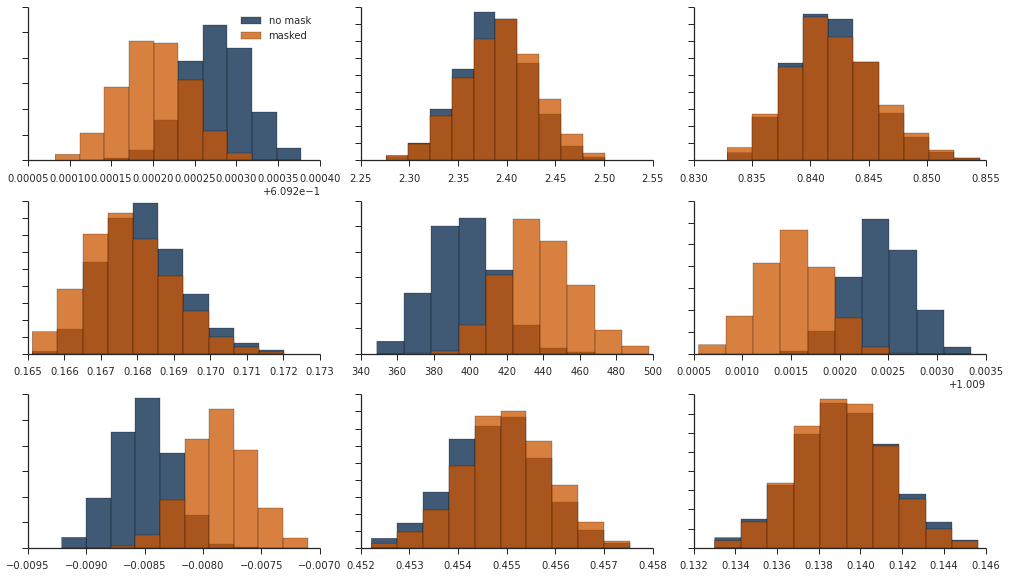

In [7]:
pars = 'tc rho b k e_ppm c x u v'.split()
cp = sb.color_palette()

with sb.axes_style('ticks'):
    fig,axs = subplots(3,3,figsize=(14,8))
    for i,p in enumerate(pars):
        rng = get_range(p)
        pe.wn[p].dropna().hist(ax=axs.flat[i], fc=cp[0], range=rng, label='no mask', grid=False, alpha=0.75)
        pe.wm[p].dropna().hist(ax=axs.flat[i], fc=cp[1], range=rng, label='masked', grid=False, alpha=0.75)
        setp(axs.flat[i].get_yticklabels(), visible=False)
    axs.flat[0].legend()
    sb.despine(fig)
    fig.tight_layout()

In [65]:
def estimate(d):
    p = array(percentile(d, [50,16,84]))
    return p[0], abs(p[1:]-p[0]).mean()
estimate(pe.wn.tc)

(0.60948117151973302, 3.7324619389600411e-05)

## Light curve plots

In [64]:
df_aux = pd.read_hdf('results/light_curves.h5', 'aux')
df_lc  = pd.read_hdf('results/light_curves.h5', 'final/bb_masked')
msk = array(df_aux.bad_mask, dtype=np.bool)

lpfw = LPFW(array(df_aux.mjd-56846+0.5)[msk], df_lc.white[msk], df_aux.airmass[msk], 4)
lpfr = LPFR(array(df_aux.mjd-56846+0.5)[msk], df_lc.white[msk], df_aux.airmass[msk], 4)

In [56]:
chains = array(pe.wm.get('tc p rho b k2 e c x u v'.split()).dropna())
flux_md = array([lpfw.compute_lc_model(pv) for pv in chains])
flux_mp = percentile(flux_md, [50,2.5,97.5], 0)
flux_bd = array([lpfw.compute_baseline(pv) for pv in chains])
flux_bp = percentile(flux_bd, [50,2.5,97.5], 0)

In [57]:
time       = lpfw.time
flux_o     = lpfw.flux_o.ravel()
flux_m     = flux_mp[0,:]
residuals  = flux_o - flux_m

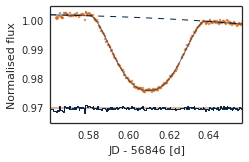

In [63]:
fig,ax = subplots(1,1, figsize=(AAOCW,0.65*AAOCW))
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.25, ms=5.5)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.5, ms=4.5, markeredgecolor=c_bo)
ax.fill_between(time, *flux_mp[1:,:], alpha=0.2)
ax.plot(time, flux_bp[0,:], '--', c=c_ob, lw=1)
ax.plot(time, flux_mp[0,:], '-', c=c_ob, alpha=0.5, lw=1)
ax.axhline(0.97, ls='-', alpha=0.5, c=c_bo)
ax.plot(time, residuals+0.97, '-', c=c_ob, drawstyle='steps-mid', lw=1)
setp(ax, xlim=time[[0,224]], ylabel='Normalised flux', xlabel='JD - {:d} [d]'.format(int(df_aux.mjd[0])), 
     yticks=[0.97,0.98,0.99,1.0])
fig.tight_layout()
fig.savefig('plots/white_lc_and_model.pdf')

---
<center> &copy; 2015 <a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a></center>